In [59]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math
import random
from matplotlib import pyplot as plt

In [96]:
data = pd.read_csv("output_x2_y1.csv")
data

,SimulationID,XStripID1,XStripID2,YStripID1,XStripEnergy1,XStripEnergy2,YStripEnergy1,ResultPositionX,ResultPositionY,ResultPositionZ,ResultDirectionX,ResultDirectionY,ResultDirectionZ
0,2.0,2.0,3.0,40.0,69.74770,229.03730,298.78500,-3.45610,0.96422,0.46527,-0.13320,-0.91164,-0.38881
1,19.0,10.0,11.0,21.0,249.12672,277.11640,526.24310,-2.42677,-1.17387,0.73476,-0.43852,-0.88572,-0.15231
2,66.0,48.0,49.0,57.0,466.22534,855.14430,1321.36960,1.96675,2.93046,-0.28656,-0.28549,0.87919,0.38147
3,70.0,25.0,26.0,62.0,90.35804,139.95743,230.27728,-0.67238,3.46873,-0.12550,0.40067,0.91479,-0.05118
4,83.0,46.0,47.0,54.0,123.84501,100.95401,224.79903,1.75243,2.55973,0.66585,0.01236,-0.41838,-0.90819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43631,999899.0,39.0,40.0,27.0,2968.25560,64.63061,3032.84810,0.94415,-0.46009,0.03900,-0.50715,-0.78855,0.34783
43632,999932.0,15.0,16.0,17.0,885.37490,516.23083,1401.60570,-1.85955,-1.70215,0.01664,0.30984,0.58359,-0.75062
43633,999953.0,4.0,5.0,62.0,2820.50780,1090.19970,3910.70730,-3.06142,3.57168,0.43224,-0.02392,-0.37644,0.92613
43634,999965.0,22.0,23.0,50.0,478.55453,328.87152,806.17065,-1.07551,2.08035,-0.64491,0.35047,-0.03520,-0.93591


In [ ]:
# feature_cols = ["XStripID1", "XStripID2", "XStripID3", "YStripID1", "YStripID2", "XStripEnergy1", "XStripEnergy2", "XStripEnergy3", "YStripEnergy1", "YStripEnergy2"]
feature_cols = ["XStripID1", "XStripID2", "YStripID1", "XStripEnergy1", "XStripEnergy2", "YStripEnergy1"]
label_cols = ["ResultPositionX", "ResultPositionY", "ResultDirectionX", "ResultDirectionY"]
x = data[feature_cols]
y = data[label_cols]
x, y 

(       XStripID1  XStripID2  YStripID1  XStripEnergy1  XStripEnergy2  \
 0            2.0        3.0       40.0       69.74770      229.03730   
 1           10.0       11.0       21.0      249.12672      277.11640   
 2           48.0       49.0       57.0      466.22534      855.14430   
 3           25.0       26.0       62.0       90.35804      139.95743   
 4           46.0       47.0       54.0      123.84501      100.95401   
 ...          ...        ...        ...            ...            ...   
 43631       39.0       40.0       27.0     2968.25560       64.63061   
 43632       15.0       16.0       17.0      885.37490      516.23083   
 43633        4.0        5.0       62.0     2820.50780     1090.19970   
 43634       22.0       23.0       50.0      478.55453      328.87152   
 43635       33.0       34.0       19.0       76.42945       98.55111   
 
        YStripEnergy1  
 0          298.78500  
 1          526.24310  
 2         1321.36960  
 3          230.27728  
 4

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 12345)

In [99]:
multi_output_rf = RandomForestRegressor(n_estimators=100, random_state=12345)
multi_output_rf.fit(
    x_train, y_train,
)

RandomForestRegressor(random_state=12345)

In [100]:
y_pred = multi_output_rf.predict(x_test)

In [101]:
y_pred, y_test

(array([[ 2.9597849,  1.4003476, -0.33326  , -0.1070325],
        [ 1.0910965,  1.7355455,  0.2751366, -0.412266 ],
        [ 2.9248764,  1.6724203,  0.5072477,  0.3082089],
        ...,
        [-2.1804949, -1.3102585, -0.2999966,  0.0720273],
        [ 1.2577654, -3.6224046,  0.2785006, -0.0282918],
        [ 3.5181754,  3.1498607,  0.3262702, -0.1491256]], shape=(13091, 4)),
        ResultPositionX  ResultPositionY  ResultDirectionX  ResultDirectionY
 14995          2.84393          1.40059          -0.40638           0.03118
 35005          1.03931          1.71375          -0.69361           0.09574
 37313          2.78320          1.71492           0.90656          -0.25635
 42670          2.86073          0.62863           0.62779          -0.08499
 19578          2.77781          2.91863          -0.13562           0.40388
 ...                ...              ...               ...               ...
 29947         -0.44714          1.37149          -0.96594          -0.17926
 14

In [102]:
distance = []
direction = []

for i in range(len(y_test)):
    error_x = y_test.iloc[i].iloc[0] - y_pred[i][0]
    error_y = y_test.iloc[i].iloc[1] - y_pred[i][1]
    distance.append(math.sqrt(error_x ** 2 + error_y**2))

    dp = y_test.iloc[i].iloc[2]  * y_pred[i][2] + y_test.iloc[i].iloc[3]  * y_pred[i][3]
    mag1 = math.sqrt(y_test.iloc[i].iloc[2] ** 2 + y_test.iloc[i].iloc[3] ** 2)
    mag2 = math.sqrt(y_pred[i][2] ** 2 + y_pred[i][3] ** 2)
    direction.append(math.degrees(math.acos(dp / mag1 / mag2)) * random.choice([1, -1]))

Average distance: 0.14963118175471302


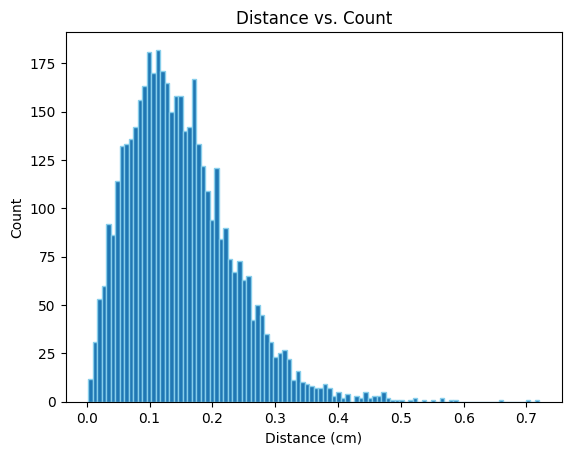

In [ ]:
print("Average distance:", np.average(distance))
plt.hist(distance, bins=100, edgecolor='skyblue')
bottom, top = plt.ylim()
# plt.ylim(0, 10)
# plt.xlim(0, 1)
plt.xlabel('Distance (cm)')
plt.ylabel('Count')
plt.title('Distance vs. Count')
plt.show()

Average direction: 0.8417312921500646


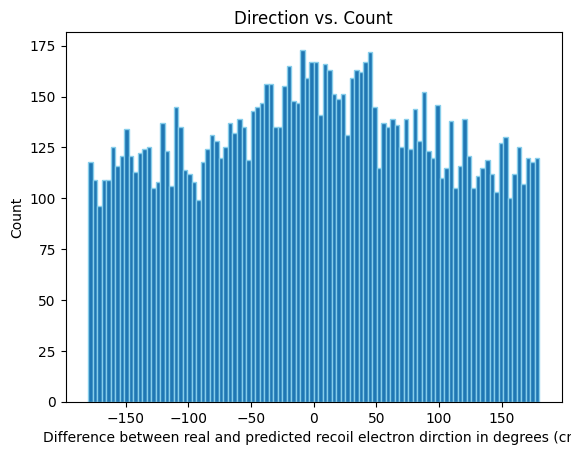

In [103]:
print("Average direction:", np.average(direction))
plt.hist(direction, bins=100, edgecolor='skyblue')
plt.xlabel('Difference between real and predicted recoil electron dirction in degrees (cm)')
plt.ylabel('Count')
plt.title('Direction vs. Count')
plt.show()